In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('optimal_ranges_combo.csv')

df = df.set_index("Unnamed: 0")

labels = df.columns.tolist()
df = df.loc[labels, labels]  

data = df.fillna("").values.tolist()

In [2]:
def get_range_width(cell):
    try:
        nums = eval(cell)
        return nums[1] - nums[0]
    except:
        return np.nan

In [3]:
value_matrix = np.array([
    [get_range_width(cell) for cell in row]
    for row in data
])

/var/folders/85/rzkn78t10p72g2_nfq5ytx3w0000gn/T/ipykernel_9003/2530898795.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i-.5, i-.5), 1, 1, fill=True, color='midnightblue', edgecolor='black'))


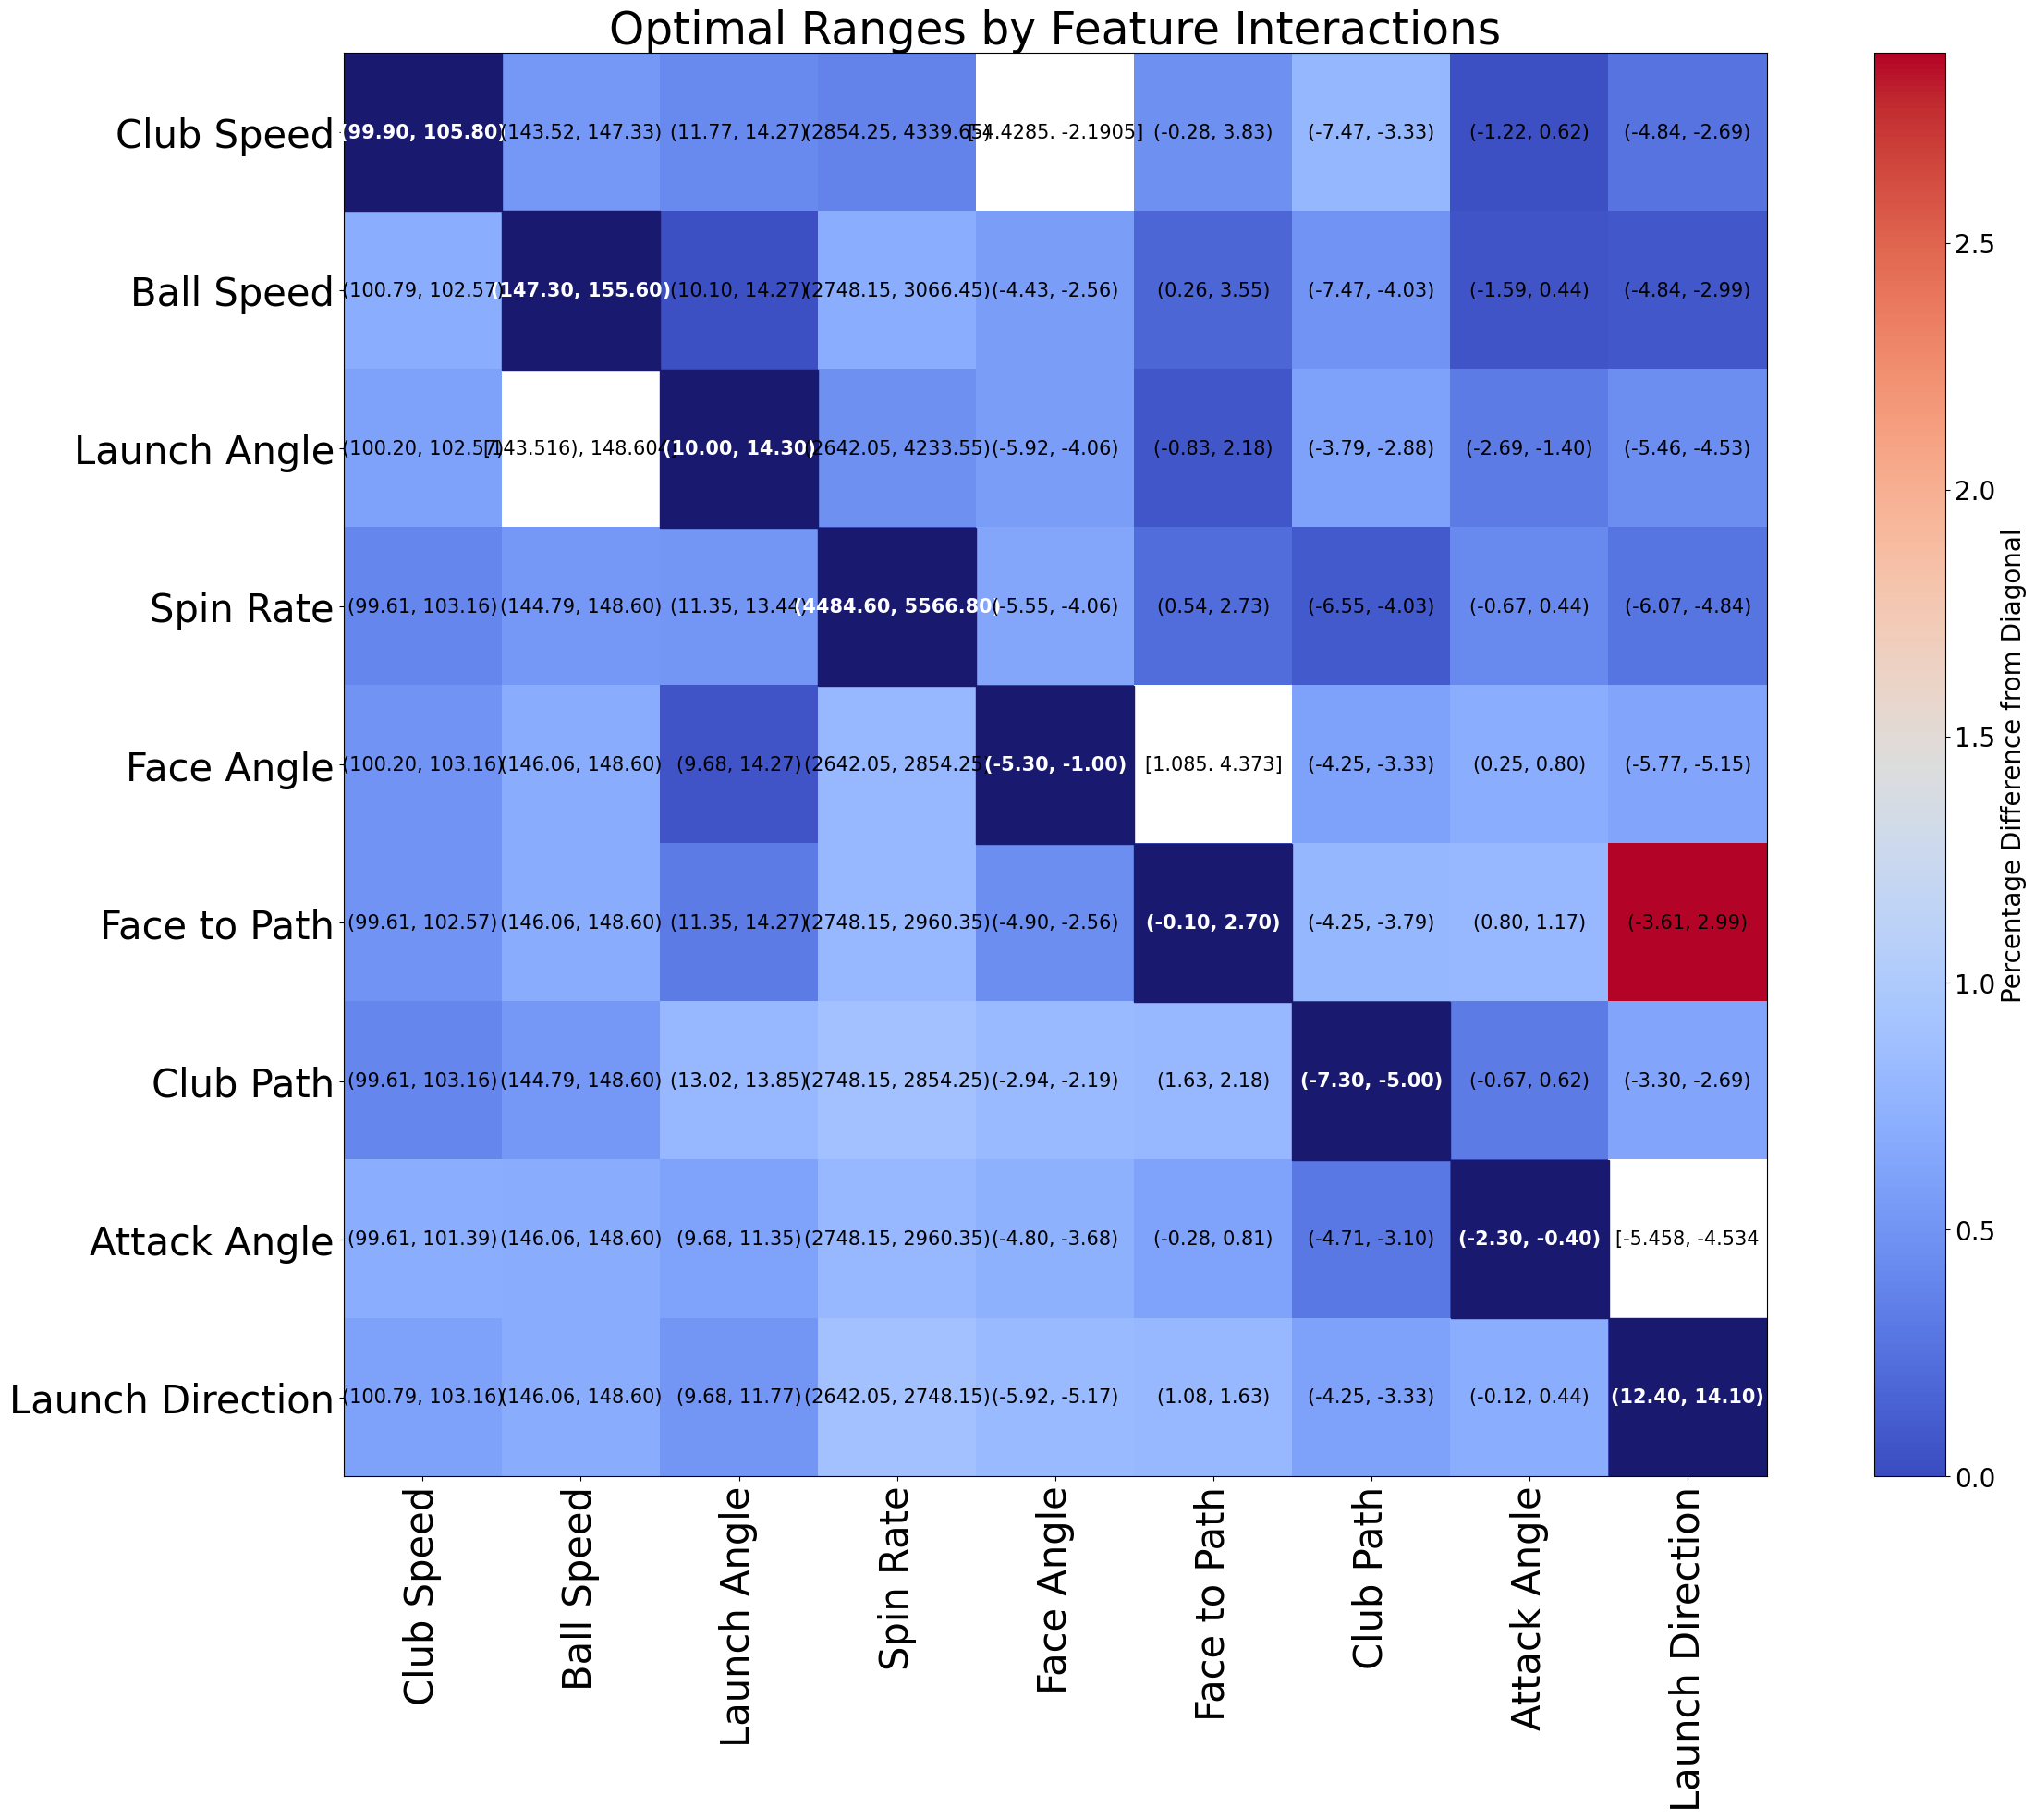

In [14]:
fig, ax = plt.subplots(figsize=(30, 20))
diag = np.diag(value_matrix)
diff_from_diag = np.abs(value_matrix - diag[np.newaxis, :])
percent_diff = np.abs(value_matrix - diag[np.newaxis, :]) / np.abs(diag[np.newaxis, :])

masked_array = np.ma.masked_invalid(percent_diff)

c = ax.imshow(masked_array, cmap='coolwarm')

for i in range(len(labels)):
    for j in range(len(labels)):
        if data[i][j] != "":
            if i == j:
                try:
                    nums = eval(data[i][j])
                    rounded_text = f"({nums[0]:.2f}, {nums[1]:.2f})"
                except:
                    rounded_text = data[i][j]
                ax.text(j, i, rounded_text, ha='center', va='center', color='white', fontsize=15, weight='bold')

                ax.add_patch(plt.Rectangle((i-.5, i-.5), 1, 1, fill=True, color='midnightblue', edgecolor='black'))
            else:
                try:
                    nums = eval(data[i][j])
                    rounded_text = f"({nums[0]:.2f}, {nums[1]:.2f})"
                except:
                    rounded_text = data[i][j]
                ax.text(j, i, rounded_text, ha='center', va='center', fontsize=15)

    

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, fontsize=30, rotation = 90)
ax.set_yticklabels(labels, fontsize=30)

plt.title("Optimal Ranges by Feature Interactions", fontsize=35)

cbar = fig.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=20)  
cbar.set_label("Percentage Difference from Diagonal", fontsize = 20)  

plt.show()

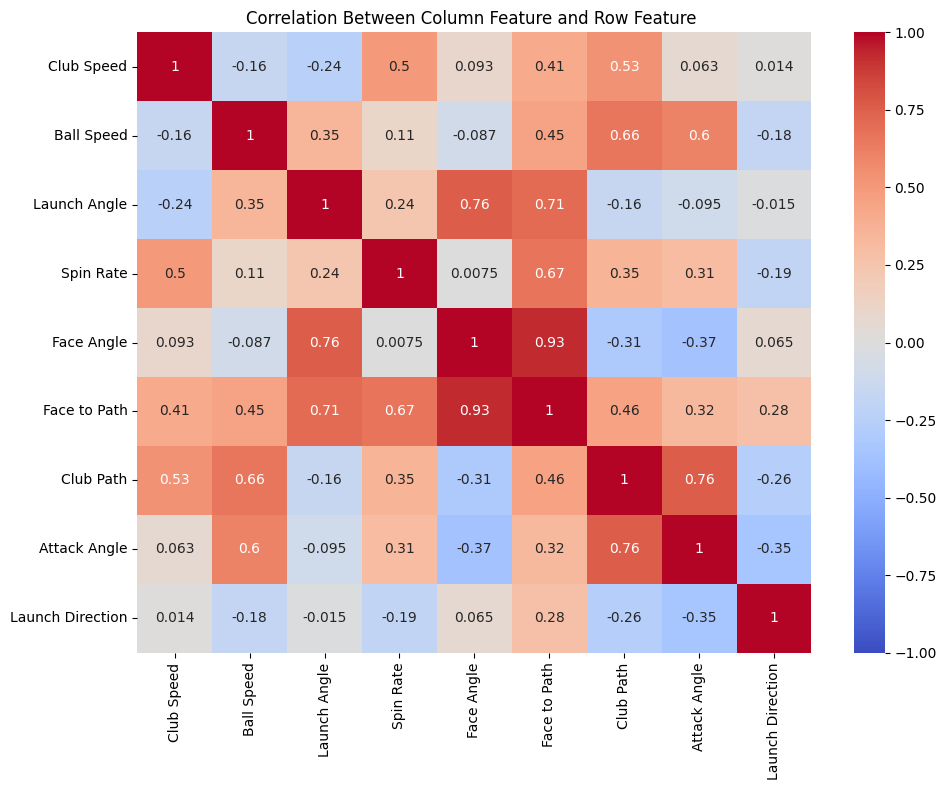

                  Club Speed  Ball Speed  Launch Angle  Spin Rate  Face Angle  \
Club Speed          1.000000   -0.163981     -0.242664   0.498721    0.092617   
Ball Speed         -0.163981    1.000000      0.347707   0.107301   -0.086822   
Launch Angle       -0.242664    0.347707      1.000000   0.236770    0.760506   
Spin Rate           0.498721    0.107301      0.236770   1.000000    0.007474   
Face Angle          0.092617   -0.086822      0.760506   0.007474    1.000000   
Face to Path        0.406937    0.449217      0.706279   0.671271    0.929659   
Club Path           0.531346    0.659742     -0.161184   0.353867   -0.306371   
Attack Angle        0.063433    0.604969     -0.094941   0.310735   -0.371340   
Launch Direction    0.014334   -0.176802     -0.014836  -0.189559    0.064978   

                  Face to Path  Club Path  Attack Angle  Launch Direction  
Club Speed            0.406937   0.531346      0.063433          0.014334  
Ball Speed            0.449217   0.65

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming value_matrix is already defined
# Example shape: (9, 9) for 9 features
# Each element represents the range width of column feature conditioned on row feature

features = [
    "Club Speed", "Ball Speed", "Launch Angle", "Spin Rate", "Face Angle",
    "Face to Path", "Club Path", "Attack Angle", "Launch Direction"
]

# Convert to DataFrame
df = pd.DataFrame(value_matrix, index=features, columns=features)

# Compute Pearson correlation coefficients (row-wise comparison)
correlation_matrix = df.corr(method='pearson')

# Display heatmap (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Column Feature and Row Feature ")
plt.tight_layout()
plt.show()

# You can also access the correlation matrix directly
print(correlation_matrix)

